# Lectura y graficación de una señal almacenada en un archivo txt

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import re

## Funciones

In [11]:
def leertxt(filename:str,header:int=2,delimiter:str=',',media:bool=True) -> tuple[np.ndarray, float]:
    # Abrimos el archivo txt para ver  el contenido
    f = open(filename,"r")
    raw_data = f.readline()  # con f.read() leemos todo el contenido
    f.close()

    ## Expresion regular para buscar automaticamente el contenido de un numero dentro de un string
    x = re.findall("[0-5][0-9]\d", raw_data)
    Fs = float(x[0])

    # Leemos el archivo excluyendo las 2 primeras filas del archivo
    array = np.genfromtxt("./"+filename, delimiter=delimiter,skip_header = header)
    if media: array[:,1:]= array[:,1:] - np.mean(array[:,1])    #le restamos la media

    return array,Fs

def plotear(array:np.ndarray,title:str,t0:float=0,tf:float=0) -> None:
    if tf==0: tf=array[-1,0]
    plt.figure().set_figwidth(15)
    plt.plot(array[:,0], array[:,1], label="señal")      # graficamos la señal
    plt.grid(linestyle=":")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Voltaje (mV)")
    plt.legend(loc="upper right")
    plt.xlim([t0,tf])
    plt.title(title)
    plt.show()

def plotearfft(array:np.ndarray,Fs:float) -> None:
    N = 2**10                                     # 10 bits, 0-1023

    signal1 = array[:,1]

    signal_fft = np.fft.fft(signal1, N)           # fft magtinud
    signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
    signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

    with np.errstate(divide='ignore'):
        signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

    F_list = np.linspace(0,Fs/2, N//2)
    F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

    plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
    plt.text(F,0, f"{F}Hz")
    plt.grid(linestyle=":")
    plt.ylabel("Magnitud (db)")
    plt.xlabel("Frecuencias (Hz)")
    plt.title("FFT en decibelios")
    plt.xlim([0,50])
    plt.xticks(np.arange(0,50,10))
    plt.show()

## Lectura y ploteo

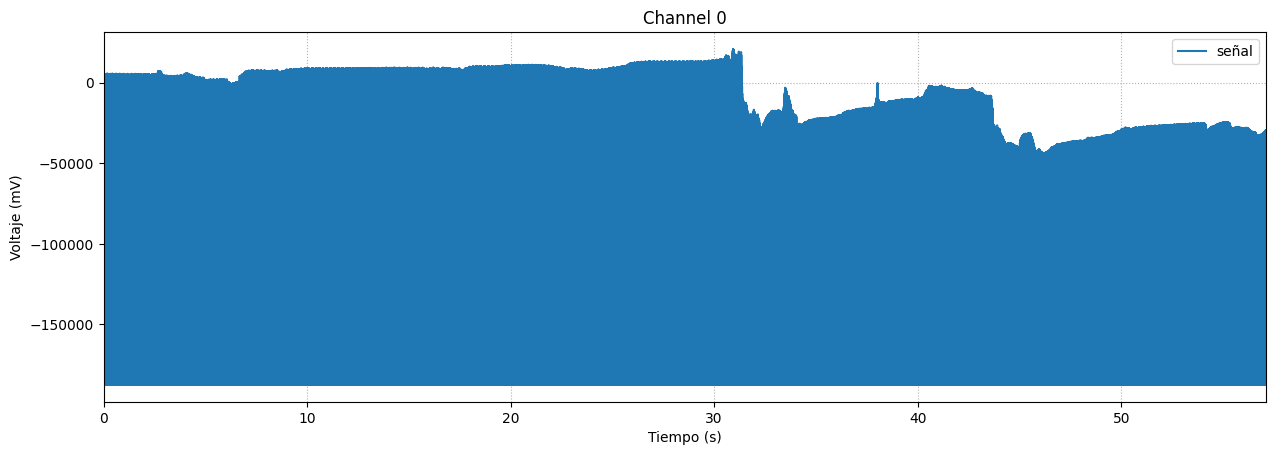

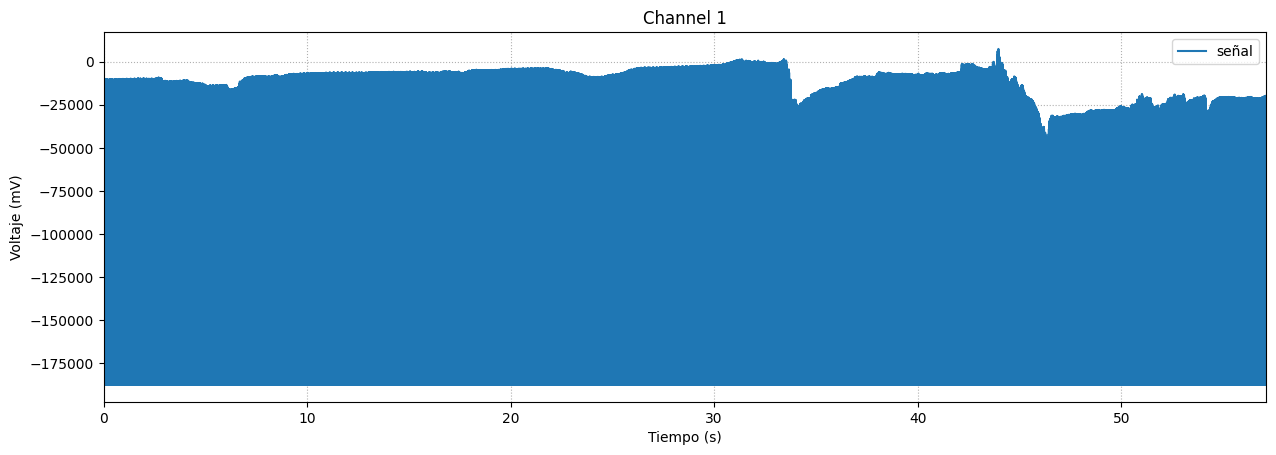

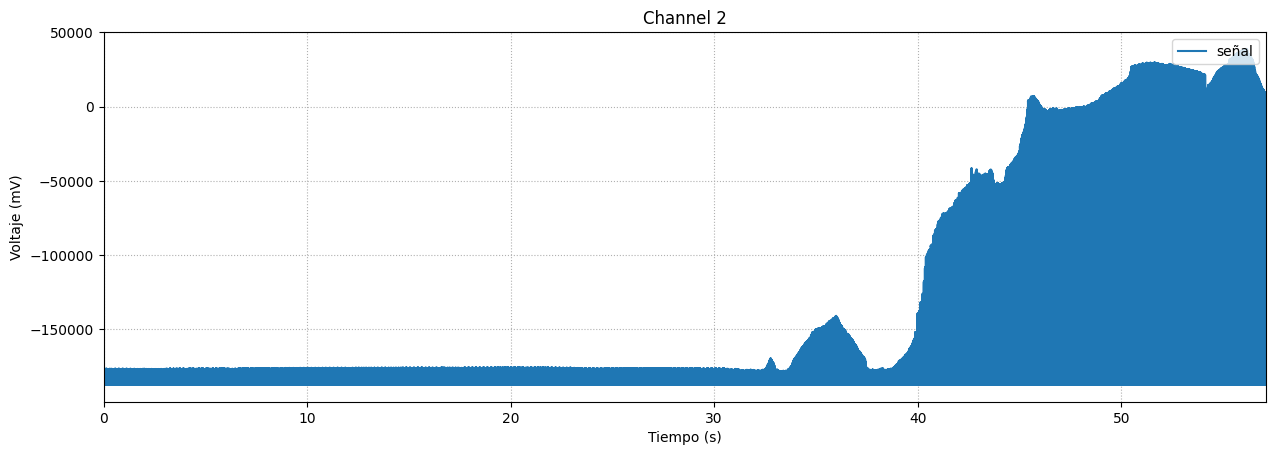

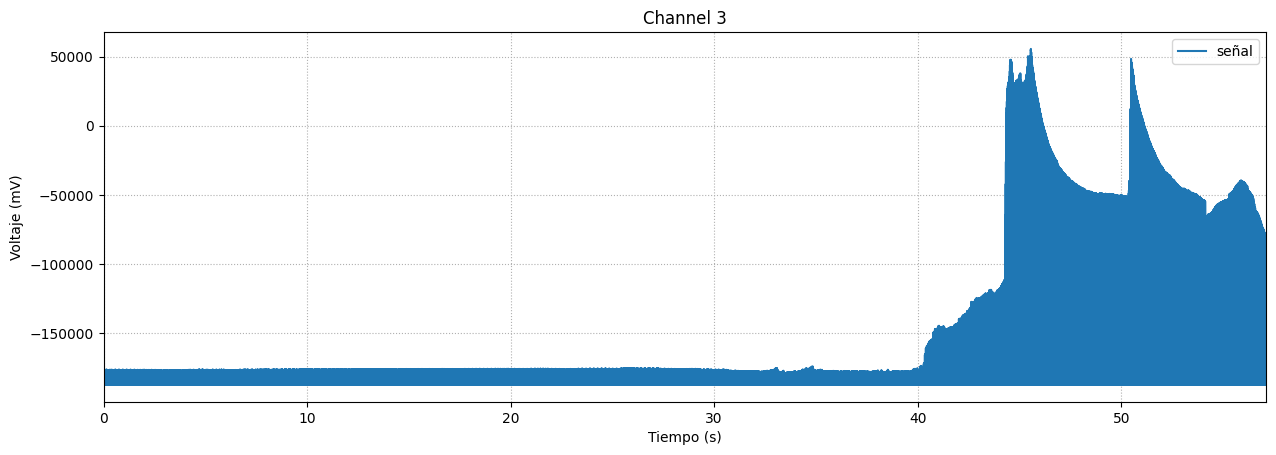

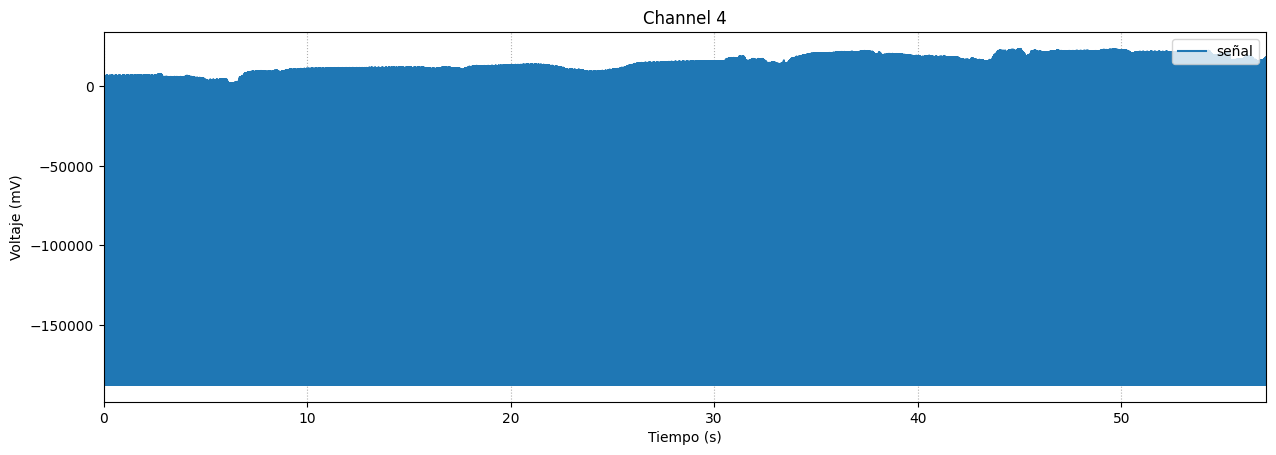

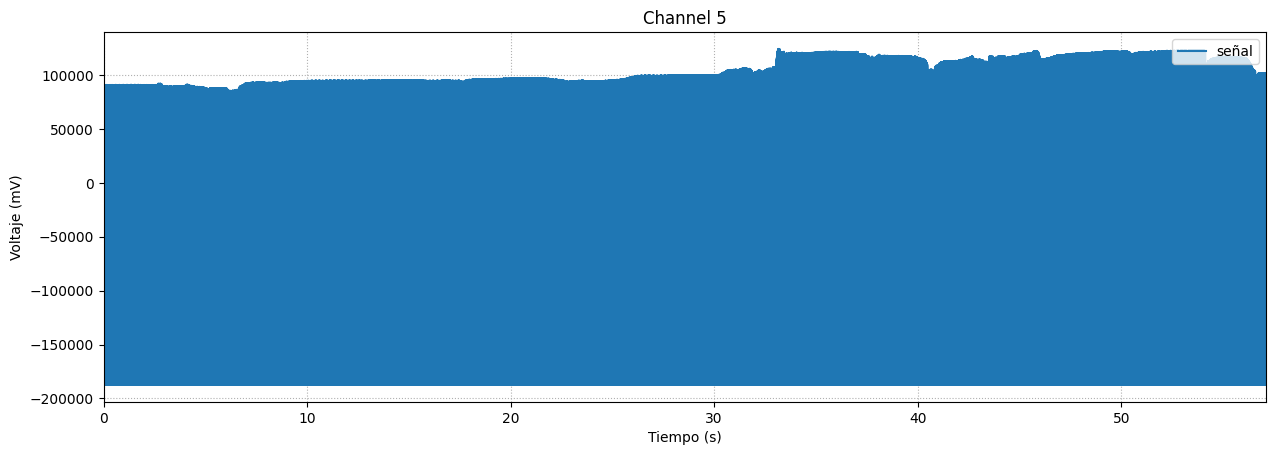

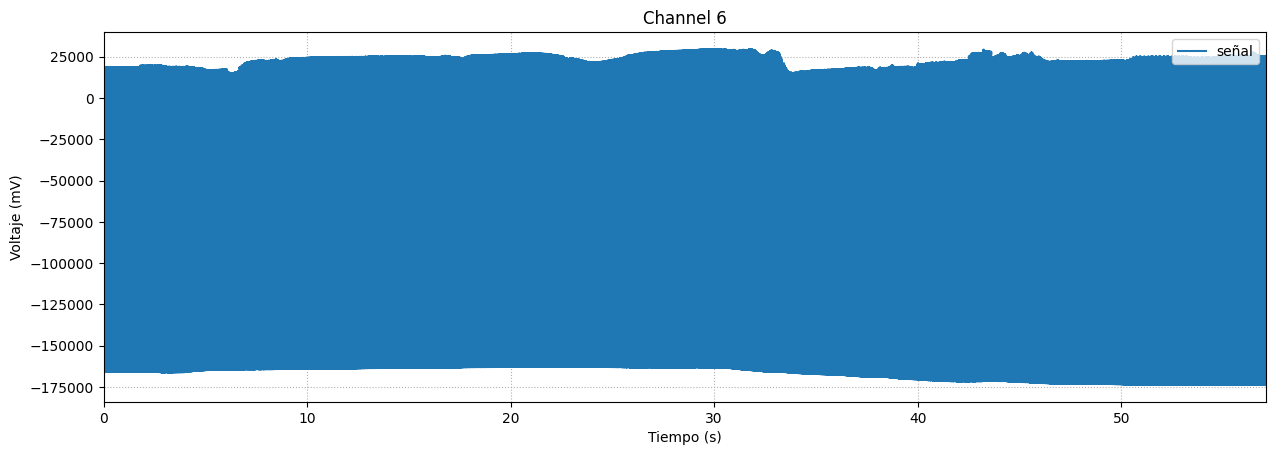

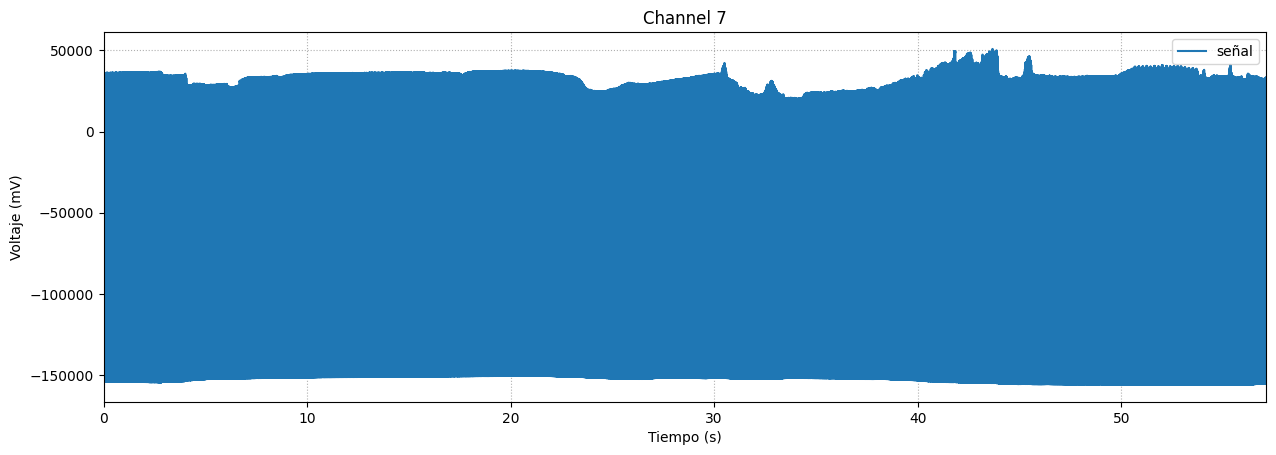

In [12]:
for i in range(8):
    array,Fs=leertxt('señal ultracortex.txt',4,media=False)
    plotear(array[:,[0,i+1]],'Channel '+str(i))